# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [30]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [31]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [32]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [33]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [34]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [36]:
#宣告採用序列模型
model = Sequential()

In [37]:
#建立模型
model.add(Dense(units=256, 
             input_dim=784, 
             kernel_initializer='normal', 
             activation='relu'))

In [38]:
#建構輸出層
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

# 訓練模型

In [39]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [40]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=32,
                         verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 100us/step - loss: 0.2710 - accuracy: 0.9222 - val_loss: 0.1322 - val_accuracy: 0.9616
Epoch 2/10
48000/48000 [==============================] - 5s 105us/step - loss: 0.1078 - accuracy: 0.9678 - val_loss: 0.1027 - val_accuracy: 0.9692
Epoch 3/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.0705 - accuracy: 0.9781 - val_loss: 0.0923 - val_accuracy: 0.9728
Epoch 4/10
48000/48000 [==============================] - 5s 101us/step - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0785 - val_accuracy: 0.9770
Epoch 5/10
48000/48000 [==============================] - 5s 103us/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0738 - val_accuracy: 0.9772
Epoch 6/10
48000/48000 [==============================] - 5s 104us/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0784 - val_accuracy: 0.9778
Epoch 7/10
48000/48000 [==============================] - 5s 10

# 以圖形顯示訓練過程

In [41]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

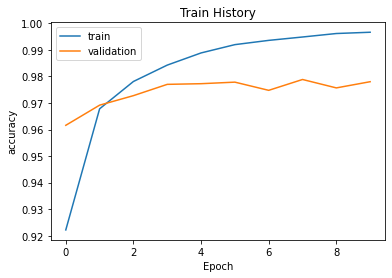

In [43]:
show_train_history(train_history,'accuracy','val_accuracy')

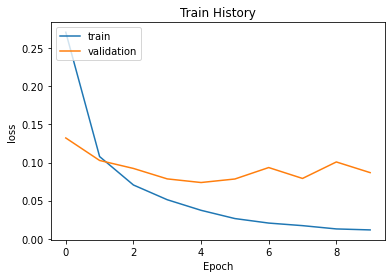

In [44]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [45]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 39us/step

accuracy= 0.9805999994277954
